In [22]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

#Import dataset
df = pd.read_csv(r'C:\Users\gunna\Downloads\cars.csv')
       
#Convert carbody into boolean data
df = pd.get_dummies(df, columns=['carbody'])
df.head()

#Remove non-numeric columns & car_ID
columns_to_remove = ['car_ID','CarName','fueltype','aspiration',
                     'doornumber','drivewheel','enginelocation',
                     'enginetype','cylindernumber','fuelsystem']

df.drop(columns=columns_to_remove, inplace=True)

#Assign price as the dependent variable
X = df.drop('price',axis=1)
y = df['price']

#Split data into test/train sets (70/30) & shuffle
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

#Assign algorithm
model = LinearRegression()

#Link algorithm to X and y variables
model.fit(X_train, y_train)

#Find y-intercept
model.intercept_

#Find X coefficients
model.coef_


array([ 2.76724395e+02,  2.16794931e+02, -1.49756578e+02,  4.74436134e+02,
        3.43674204e+02,  3.45064730e+00,  9.80561751e+01, -1.11669775e+03,
       -1.87823547e+03,  2.27674253e+02,  3.49634403e+01,  2.30549852e+00,
       -2.41238299e+02,  1.67938085e+02,  5.10314115e+03,  8.14810331e+02,
       -2.16087173e+03, -1.20843973e+03, -2.54864003e+03])

In [24]:
#Data point to predict 
car = [
    3, #symboling
    88.6, #wheelbase
    168.8, #carlength
    64.1, #carwidth
    48.8, #carheight
    2548, #curbweight
    130, #enginesize
    3.47, #boreratio
    2.68, #stroke
    9, #compressionratio
    111, #horsepower
    5000, #peakrpm
    21, #citympg
    27, #highwaympg
    1, #carbody_convertible
    0, #carbody_hardtop
    0, #carbody_hatchback
    0, #carbody_sedan
    0, #carbody_wagon  
]

# Make prediction
car= model.predict([car])
car

C:\Python\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17942.65349086])

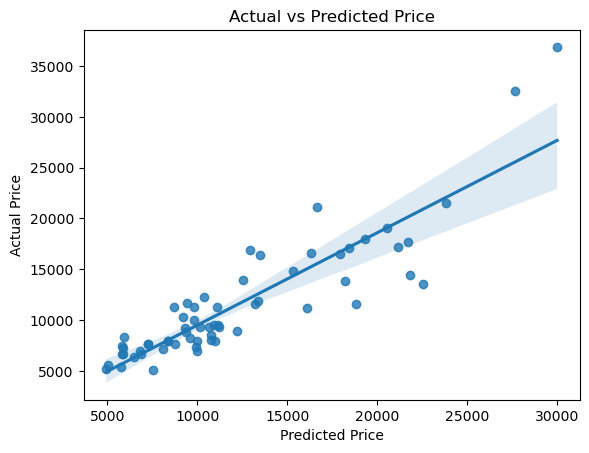

In [25]:
pred = model.predict(X_test)

sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()